In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import joblib

In [2]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (8124, 23)


In [4]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### class column is our target variable containing the class of mushrooms.whole dataset is of type object

In [6]:
print('Number of edible mushrooms are:',df['class'].value_counts()[0])
print('Number of poisonous mushrooms are:',df['class'].value_counts()[1])
print('Unbalanced dataset' if df['class'].value_counts()[0]!=df['class'].value_counts()[1] else 'Balanced dataset')

Number of edible mushrooms are: 4208
Number of poisonous mushrooms are: 3916
Unbalanced dataset


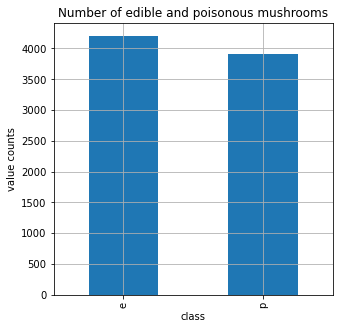

In [7]:
plt.figure(figsize=[5,5])
df['class'].value_counts().plot(kind='bar')
plt.xlabel("class")
plt.ylabel('value counts')
plt.title('Number of edible and poisonous mushrooms')
plt.grid()

### I will now convert alphabets to numberical data of df
### assign each aphabet a unique number

In [8]:
dicty={}
for i in list(df.columns):
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto

In [9]:
dicty

{'class': {'p': 0, 'e': 1},
 'cap-shape': {'x': 0, 'b': 1, 's': 2, 'f': 3, 'k': 4, 'c': 5},
 'cap-surface': {'s': 0, 'y': 1, 'f': 2, 'g': 3},
 'cap-color': {'n': 0,
  'y': 1,
  'w': 2,
  'g': 3,
  'e': 4,
  'p': 5,
  'b': 6,
  'u': 7,
  'c': 8,
  'r': 9},
 'bruises': {'t': 0, 'f': 1},
 'odor': {'p': 0,
  'a': 1,
  'l': 2,
  'n': 3,
  'f': 4,
  'c': 5,
  'y': 6,
  's': 7,
  'm': 8},
 'gill-attachment': {'f': 0, 'a': 1},
 'gill-spacing': {'c': 0, 'w': 1},
 'gill-size': {'n': 0, 'b': 1},
 'gill-color': {'k': 0,
  'n': 1,
  'g': 2,
  'p': 3,
  'w': 4,
  'h': 5,
  'u': 6,
  'e': 7,
  'b': 8,
  'r': 9,
  'y': 10,
  'o': 11},
 'stalk-shape': {'e': 0, 't': 1},
 'stalk-root': {'e': 0, 'c': 1, 'b': 2, 'r': 3, '?': 4},
 'stalk-surface-above-ring': {'s': 0, 'f': 1, 'k': 2, 'y': 3},
 'stalk-surface-below-ring': {'s': 0, 'f': 1, 'y': 2, 'k': 3},
 'stalk-color-above-ring': {'w': 0,
  'g': 1,
  'p': 2,
  'n': 3,
  'b': 4,
  'e': 5,
  'o': 6,
  'c': 7,
  'y': 8},
 'stalk-color-below-ring': {'w': 0,
  '

### substitue categorical data in dataset to numeric

In [10]:
for i in list(df.columns):
    df[i]=df[i].apply(lambda x:dicty[i][x])

### check which columns are relevant drop rest. 

In [11]:
df.corr()['class']

class                       1.000000
cap-shape                  -0.112110
cap-surface                 0.169663
cap-color                  -0.042028
bruises                    -0.501530
odor                       -0.582015
gill-attachment             0.129200
gill-spacing                0.348387
gill-size                   0.540024
gill-color                 -0.412869
stalk-shape                 0.102019
stalk-root                 -0.337542
stalk-surface-above-ring   -0.552044
stalk-surface-below-ring   -0.532452
stalk-color-above-ring     -0.225294
stalk-color-below-ring     -0.098476
veil-type                        NaN
veil-color                  0.120766
ring-number                 0.152261
ring-type                  -0.556515
spore-print-color          -0.560715
population                 -0.155254
habitat                    -0.191297
Name: class, dtype: float64

### from the above I can conclude that columns other than bruises, odor, gill-size, stalk-surface-above-ring ,stalk-surface-below-ring , ring-type,spore-print-color can be dropped (for good correlation >=+/- 0.5)

### check outliers of specific columns

<AxesSubplot:xlabel='bruises'>

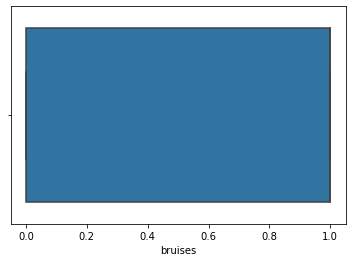

In [12]:
sn.boxplot(df['bruises'])

<AxesSubplot:xlabel='odor'>

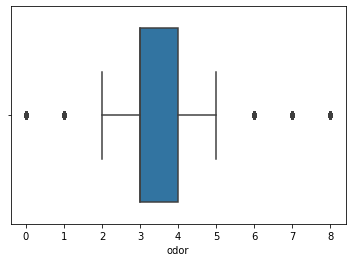

In [13]:
sn.boxplot(df['odor'])

<AxesSubplot:xlabel='gill-size'>

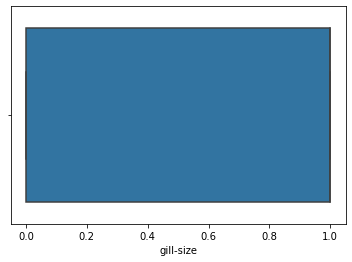

In [14]:
sn.boxplot(df['gill-size'])

<AxesSubplot:xlabel='stalk-surface-above-ring'>

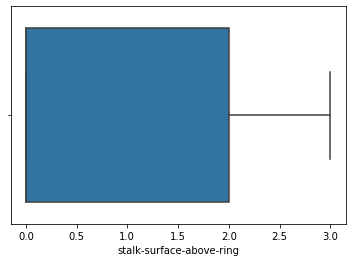

In [15]:
sn.boxplot(df['stalk-surface-above-ring'])

<AxesSubplot:xlabel='stalk-surface-below-ring'>

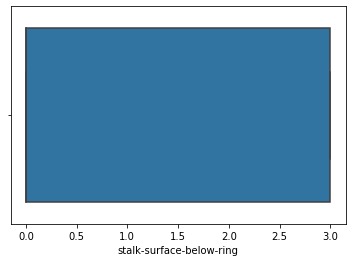

In [16]:
sn.boxplot(df['stalk-surface-below-ring'])

<AxesSubplot:xlabel='ring-type'>

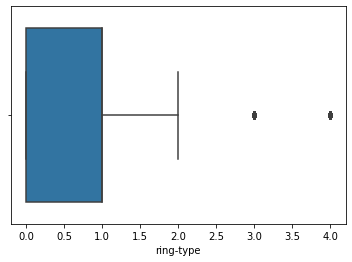

In [17]:
sn.boxplot(df['ring-type'])

<AxesSubplot:xlabel='spore-print-color'>

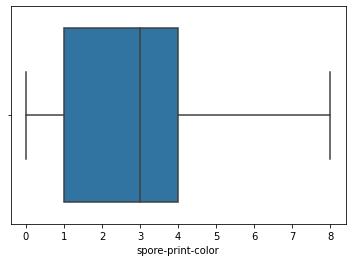

In [18]:
sn.boxplot(df['spore-print-color'])

### odor and ring-type contains outlier. Plot to cross check and remove those datapoints

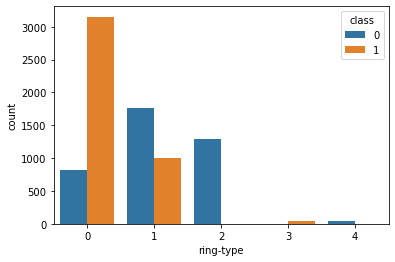

In [19]:
sn.countplot(x="ring-type",hue="class",data=df)
plt.show()

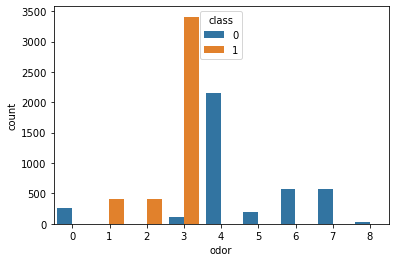

In [20]:
sn.countplot(x="odor",hue="class",data=df)
plt.show()

In [21]:
df_clean=df[df['ring-type']<2][df['odor']<5][df['odor']>2]

In [22]:
df_clean.shape

(4344, 23)

In [23]:
(df.shape[0]-df_clean.shape[0])/df.shape[0]

0.465288035450517

In [24]:
df[df.apply(zscore)<=3].shape

(8124, 23)

In [25]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(3568, 23)

In [26]:
(8124-3568)/8124

0.5608074839980305

### outliers cannot be removed as there is more than 10% data loss (zscore is unable to remove any outlier)

### use oversampling to avoid unbalanced dataset

In [27]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [28]:
sm=SMOTE()
x,y=sm.fit_resample(df[['bruises','odor','gill-size','stalk-surface-above-ring','stalk-surface-below-ring','ring-type','spore-print-color']], df[['class']])

In [29]:
y.value_counts()

class
0        4208
1        4208
dtype: int64

### Now perform feature scaling

In [30]:
sc=StandardScaler()
sc.fit(x)
fx=sc.transform(x)
x=pd.DataFrame(fx,columns=x.columns)

In [31]:
x

,bruises,odor,gill-size,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color
0,-1.208048,-2.304426,-1.461775,-0.74145,-0.756354,-0.899734,-1.288619
1,-1.208048,-1.668347,0.684100,-0.74145,-0.756354,-0.899734,-0.711971
2,-1.208048,-1.032268,0.684100,-0.74145,-0.756354,-0.899734,-0.711971
3,-1.208048,-2.304426,-1.461775,-0.74145,-0.756354,-0.899734,-1.288619
4,0.827782,-0.396189,0.684100,-0.74145,-0.756354,0.366514,-0.711971
...,...,...,...,...,...,...,...
8411,0.827782,2.148128,-1.461775,-0.74145,-0.756354,0.366514,1.017973
8412,-1.208048,0.239890,0.684100,-0.74145,-0.756354,-0.899734,0.441325
8413,0.827782,0.239890,-1.461775,1.44191,-0.756354,0.366514,1.017973
8414,0.827782,0.875969,-1.461775,-0.74145,-0.756354,-0.899734,-0.711971


### perform pca for dimension reducing for dimension reducing

In [32]:
for i in range(2,8):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.7260658373355455
3 0.8006480251056666
4 0.864300808468532
5 0.9175643547935062
6 0.9672610226649614
7 1.0


### my personal choice to take pca component with data retention more than 95% so i will choose 6

In [33]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

### Now we will start with model selection and tuning training process.
### first find the most optimum model
### second we need to find the most optimum random state in train test split
### we shall evaluate model on f1score as it is balanced dataset

### Now write code to find best model along with the best hyper parameter

In [34]:
models=[LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier,SVC]
param={LogisticRegression:(),DecisionTreeClassifier:(),
       KNeighborsClassifier:{"n_neighbors":range(1,30)},
      RandomForestClassifier:{"n_estimators":[10,100,500]},
      SVC:{"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}}

In [35]:
best_model_score=0
best_model=0
paramy=0
paramx=0
for model in models:
    if len(param[model])!=0:
        clf = GridSearchCV(model(), param[model], cv=5,scoring="f1")
        clf.fit(principalComponents,y)
        dicty=clf.best_params_
        if len(dicty)==1:
            score=cross_val_score(model(*dicty.values()),principalComponents,y,cv=5,scoring="f1").mean()
            paramx=dicty
        else:
            score=cross_val_score(model(kernel=dicty['kernel'],C=dicty['C']),principalComponents,y,cv=5,scoring="f1").mean()
            paramx=dicty
    else:
        score=cross_val_score(model(),principalComponents,y,cv=5,scoring="f1").mean()
        paramx=0
    if score>best_model_score:
        best_model_score=score
        best_model=model
        paramy=paramx
print('Best model:',best_model)
print('parameters used are:',paramy)
print('F1 score:',best_model_score)

Best model: <class 'sklearn.svm._classes.SVC'>
parameters used are: {'C': 10, 'kernel': 'poly'}
F1 score: 0.9941320293398533


### write code to find most optimum training set

In [36]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y,shuffle=True)
        model.fit(x_train,y_train)
        tmp=f1_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    print("maximum f1_score is at random state :",random," and it is :",score)

In [37]:
besttrain(SVC(kernel='poly',C=10),principalComponents,y)

maximum f1_score is at random state : 42  and it is : 1.0


In [38]:
svc=SVC(kernel="poly",C=10)
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 42,test_size=0.20,stratify=y)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("Mean f1 score for SVM classifier: ",cross_val_score(svc,principalComponents,y,cv=5,scoring="f1").mean())
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
print("standard deviation in f1 score for SVM classifier: ",cross_val_score(svc,principalComponents,y,cv=5,scoring="f1").std())
print(cross_val_score(svc,principalComponents,y,cv=5,scoring="f1"))

Mean f1 score for SVM classifier:  0.9941320293398533
Confusion matrix 
 [[842   0]
 [  0 842]]
f1 score is :  1.0
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684

AUC ROC Score:  1.0
standard deviation in f1 score for SVM classifier:  0.011735941320293408
[1.         1.         1.         1.         0.97066015]


In [39]:
joblib.dump(svc,'TOPI.obj')

['TOPI.obj']